# Data Cleaning and Tiding For Rating System Project

In [1]:
import numpy as np
import pandas as pd

## Gathering Data

### Connect to Database

In [2]:
# Create SQLAlchemy Engine
from sqlalchemy import create_engine
# Change the value of CONNECTION_STRING to your Postgresql connection string
CONNECTION_STRING = ''
engine = create_engine(CONNECTION_STRING)

### Read scrapped data into a pandas DataFrame

In [3]:
df = pd.read_sql('SELECT * FROM scraped;', engine)

## Assessing Data

In [4]:
df.info()
df.sample(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   143 non-null    int64 
 1   image_urls           143 non-null    object
 2   link                 143 non-null    object
 3   title                143 non-null    object
 4   rating               143 non-null    object
 5   no_of_reviews        143 non-null    object
 6   description          143 non-null    object
 7   comments             143 non-null    object
 8   rating_distribution  143 non-null    object
 9   features             143 non-null    object
dtypes: int64(1), object(9)
memory usage: 11.3+ KB


,id,image_urls,link,title,rating,no_of_reviews,description,comments,rating_distribution,features
22,23,https://m.media-amazon.com/images/I/910A6B1Sa4...,https://www.amazon.com/Toshiba-HDTB420XK3AA-Ca...,Toshiba (HDTB420XK3AA) Canvio Basics 2TB Porta...,4.7 out of 5 stars,"24,701",Back to results 1TB2TB4TBP...,\nlibrarian's daughter\n1.0 out of 5 stars\n\n...,5 stars represent 84% of rating 4 stars repres...,\nPortability 4.7\nEasy to install 4.7\nEa...
101,102,https://m.media-amazon.com/images/I/61YyzKD24d...,https://www.amazon.com/AMD-Processor-Wraith-St...,AMD Ryzen 5 2600 Processor with Wraith Stealth...,4.8 out of 5 stars,"16,769",Back to results VIDEO Proc...,\nTiny Giant \n5.0 out of 5 stars\n\n Lets ma...,5 stars represent 88% of rating 4 stars repres...,\nValue for money 4.8\nStability 4.7\nEasy...
63,60,https://m.media-amazon.com/images/I/91K9SyGiyz...,https://www.amazon.com/Acer-R240HY-bidx-23-8-I...,Acer R240HY bidx 23.8-Inch IPS HDMI DVI VGA (1...,4.6 out of 5 stars,"9,819",Back to results VIDEO 21.5...,\nRayna\n5.0 out of 5 stars\n\n I bought two ...,5 stars represent 79% of rating 4 stars repres...,\nBrightness 4.4\nPicture quality 4.4\nQua...
89,90,https://m.media-amazon.com/images/I/91vw9DRl4K...,https://www.amazon.com/Sceptre-DisplayPort-Edg...,"Sceptre Curved 27"" Gaming Monitor up to 185Hz ...",4.7 out of 5 stars,358,"Back to results 24"" Curved...",\nMaddok\n5.0 out of 5 stars\n\n I've played ...,5 stars represent 83% of rating 4 stars repres...,\nSheerness 4.9\nThickness 4.8\nFor gaming...
52,51,https://m.media-amazon.com/images/I/61su-fwFdR...,https://www.amazon.com/Microphone-NexiGo-Compu...,"1080P Web Camera, HD Webcam with Microphone & ...",4.4 out of 5 stars,"5,946",Back to results VIDEO 【Ful...,"\nstephen\n5.0 out of 5 stars\n\n ok, since C...",5 stars represent 65% of rating 4 stars repres...,\nEasy to install 4.6\nAuto focus 4.3\nCam...
118,119,https://m.media-amazon.com/images/I/71LZpZrvYb...,https://www.amazon.com/Lenovo-Chromebook-i3-10...,"Plustek Photo Scanner - ephoto Z300, Scan 4x6 ...",4.5 out of 5 stars,"1,214",Back to results Make sure...,\nKingsman\n5.0 out of 5 stars\n\n Best bang-...,5 stars represent 75% of rating 4 stars repres...,\nValue for money 4.9\nQuality of material ...
110,111,https://m.media-amazon.com/images/I/719pO3I+ox...,https://www.amazon.com/AutoFocus-Microphone-Ne...,[2 Pack] OMOTON Tempered Glass Screen Protecto...,4.6 out of 5 stars,451,Back to results 【1080P Ful...,\nAnne\n5.0 out of 5 stars\n\n Camera quality...,5 stars represent 77% of rating 4 stars repres...,\nEasy to install 4.8\nSheerness 4.7\nCame...


Checking for nulls and duplicates

In [5]:
df.isna().sum()

id                     0
image_urls             0
link                   0
title                  0
rating                 0
no_of_reviews          0
description            0
comments               0
rating_distribution    0
features               0
dtype: int64

In [6]:
df.duplicated().sum()

0

Check the distribution of values in the `rating` column

In [7]:
df.rating.value_counts()

4.7 out of 5 stars    38
4.6 out of 5 stars    31
4.5 out of 5 stars    28
4.8 out of 5 stars    22
4.4 out of 5 stars    14
4.3 out of 5 stars     3
4.9 out of 5 stars     3
4.0 out of 5 stars     2
4.2 out of 5 stars     2
Name: rating, dtype: int64

Check the structure of the `rating distribution`, `features`, `title`, `description`, and `comments` columns

See the random row samples of each column

In [8]:
# Function to see 3 random rows of a given column
import random

def see_sample(df, col, num):
    min_id = df['id'].min()
    max_id = df['id'].max()
    for i in range(num):
        print(df[col][random.randint(min_id, max_id)], '\n')

In [9]:
see_sample(df, 'rating_distribution', 3)

5 stars represent 63% of rating 4 stars represent 19% of rating 3 stars represent 8% of rating 2 stars represent 3% of rating 1 stars represent 7% of rating 

5 stars represent 73% of rating 4 stars represent 14% of rating 3 stars represent 5% of rating 2 stars represent 2% of rating 1 stars represent 6% of rating 

5 stars represent 76% of rating 4 stars represent 13% of rating 3 stars represent 5% of rating 2 stars represent 2% of rating 1 stars represent 5% of rating 



In [10]:
see_sample(df, 'features', 3)


Value for money   5.0
Fingerprint reader   4.6
Touch Screen   4.4
Battery life   4.2
Screen quality   4.1
Camera quality   3.7 


Packaging   4.8
Face recognition   4.7
Touch Screen   4.7
Value for money   4.7
Anti-glare   4.4
Easy to install   4.4 


Durability   4.6
Easy to use   4.5
Comfort   4.4
For gaming   4.3
Ergonomic   4.3
Quality of material   4.0 



In [11]:
see_sample(df, 'title', 5)

Seagate IronWolf 4TB NAS Internal Hard Drive HDD – CMR 3.5 Inch SATA 6Gb/s 5900 RPM 64MB Cache for RAID Network Attached Storage – Frustration Free Packaging (ST4000VNZ008/VN008) 

Western Digital 1TB WD Blue PC Hard Drive - 7200 RPM Class, SATA 6 Gb/s, , 64 MB Cache, 3.5" - WD10EZEX 

OtterBox DEFENDER SERIES Case for iPad 8th & 7th Gen (10.2" Display - 2020 & 2019 version) - BLACK 

JETech Screen Protector for iPad Pro 12.9-Inch (2020 and 2018 Model, Edge to Edge Liquid Retina Display), Face ID Compatible, Tempered Glass Film 

NVIDIA SHIELD Android TV Pro 4K HDR Streaming Media Player; High Performance, Dolby Vision, 3GB RAM, 2x USB, Works with Alexa 



In [12]:
see_sample(df, 'description', 3)

Back to results                     VIDEO  Make sure this fitsby entering your model number.Long wireless range: Stream and control your music with a reliable connection from up to 15 meters 50-ft, 1 Year warranty.Listen music wireless:Stream your audio entertainment from your smart phone or table.Listen music through your perfect sound system from your smart phone or tablet with perfect sound qualityEasy to setup: Simply pair your smart phone or tablet to the audio adapter with a single button pressSuperior acoustics: Don’t compromise on sound delivers high-quality acousticsWorks with most speakers: Plug the adapter into any A/V receivers and any powered speakers using standard RCA or 3.5mm jacksThis item:Bluetooth Audio Adapter for Music Streaming Sound System, esinkin W29-us Wireless Audio Adapter… $22.95 In Stock.Sold by Esinkin Inc. and ships from Amazon Fulfillment.Monoprice 1.5ft Premium 2 RCA Plug/2 RCA Plug M/M 22AWG Cable - Black $6.84 In Stock.Ships from and sold by Amazon.c

In [13]:
see_sample(df, 'comments', 1)


tech_dad
3.0 out of 5 stars

  Purchased to replace a 6 yr old asus 21.5" led monitor (nothing wrong with the old monitor, just wanted a bigger screen).Currently connected via hdmi -&gt; hdmi. Just ordered a DP -&gt; hdmi to test with. Will update if it affects the review. Let's get to the Pros:* Interior packing seem to cushion the screen well (no visible damage to screen)* Assembly was quick (2 screws to the arm to the back of the screen, and rotate to lock base in place)* Screw cover and screw driver included* Power cable nice and long (i only needed 3 ft, plenty to keep coiled up)* No profile frame is very pretty (so thin)* Colors are very vibrant (kids play a lot of roblox, lots of color variants and looks wonderful)Now onto the cons:* A little dim. No where as bright as the old led monitor (especial during the day)* Video inputs are back facing* Control buttons are on the back of the monitor* Stand is flimsy and rocks a little when using the control buttons to turn on/off the mo

### Quality Issues

1. `rating` column should only have a rating numerator.
2. `rating` column should should be of the float dtype.
3. Text in `rating_distribution` column is redundant.
4. `no_of_reviews` column should should be of the int dtype.
5. `description` text is not just a product description.

### Tidiness Issues

1. The structure of the `features` column is hard to work with.
2. The structure of the `comments` column is hard to work with.

## Cleaning Data

In [14]:
# Making copy of the Dataframes
df_clean = df.copy()

### Fixing Quality Issues

#### Quality 1

##### Define:
`rating` column should only have a rating numerator.

##### Code:

In [15]:
# Only extract the given rating
ratings = []
for rating in df_clean.rating:
    ratings.append(rating[:3])
    
df_clean.rating = ratings

##### Test:

In [16]:
df_clean.rating.sample(15)

27     4.7
15     4.6
95     4.8
76     4.8
132    4.5
98     4.5
105    4.6
99     4.8
42     4.7
90     4.7
17     4.4
108    4.8
24     4.8
28     4.4
117    4.6
Name: rating, dtype: object

#### Quality 2

##### Define:
`rating` column should should be of the float dtype.

##### Code:

In [17]:
# Change data type of `rating` column to float
df_clean['rating'] = df_clean['rating'].astype(float)

##### Test:

In [18]:
df_clean.rating.dtype

dtype('float64')

#### Quality 3

##### Define:
Text in `rating_distribution` column is redundant.

##### Code:

In [19]:
# Find each rating's percentage for each rating distribution
import re

rating_distributions = []
for distribution in df_clean.rating_distribution:
    ratings = re.findall(r"(\d)([^0-9%]*)(\d+%)", distribution)

    rating_distribution = []
    for rating in ratings:
        # Separate rating and distribution with a colon only
        rating_distribution.append(f'{rating[0]}:{rating[2]}')
        
    # Join each rating's distributions with bars
    new_rating = '|'.join(rating_distribution)
    rating_distributions.append(new_rating)

In [20]:
# Replace old redundant distributions with new format
df_clean.rating_distribution = rating_distributions

##### Test:

In [21]:
# Check the new `rating_distribution` column structure
df_clean.rating_distribution.sample(5)

92     5:81%|4:13%|3:4%|2:1%|1:1%
8      5:78%|4:10%|3:5%|2:2%|1:5%
67     5:85%|4:10%|3:2%|2:1%|1:3%
30     5:82%|4:12%|3:3%|2:1%|1:2%
108     5:93%|4:4%|3:1%|2:1%|1:2%
Name: rating_distribution, dtype: object

#### Quality 4

##### Define:
`no_of_reviews` column should should be of the int dtype.

##### Code:

In [22]:
# Change each `no_of_reviews` value to be only a number with no separating commas
df_clean['no_of_reviews'] = df_clean['no_of_reviews'].apply(lambda num: ''.join(re.findall('\d+', num)))

In [23]:
# Change the data type of `no_of_reviews` to int
df_clean['no_of_reviews'] = df_clean['no_of_reviews'].astype(int)

##### Test:

In [24]:
# Check the new format of values in `no_of_reviews`
df_clean.no_of_reviews

0      36325
1       4917
2      21366
3      41356
4      65198
       ...  
138     2055
139    15341
140     2553
141     2686
142    13743
Name: no_of_reviews, Length: 143, dtype: int64

In [25]:
# Check the data type in `no_of_reviews`
df_clean.no_of_reviews.dtype

dtype('int64')

#### Quality 5

##### Define:
`description` text is not just a product description.

<b style="color: red;">Note: This issue is better solved when scrapping data.</b>

##### Code:

In [26]:
# Clean `description` from 'Back to results' statement and unnecessary whitespace
df_clean['description'] = df_clean['description'].apply(lambda des: re.sub(r'\bBack to results', '', des).strip())

##### Test:

In [27]:
# Check random values from the cleaned `description` column
see_sample(df_clean, 'description', 3)

Intel Core i5 10th GenIntel Core i7 9th Gen15.6-inch 144Hz17.3-inch 144HzNotebook onlyWith Accessory BundleWith BackpackWith HeadsetWith Mouse Make sure this fitsby entering your model number.10th Generation Intel Core i5-10300H Processor (Up to 4.5GHz)15" Full HD Widescreen IPS LED-backlit 144Hz Refresh Display | NVIDIA GeForce GTX 1650 Ti Graphics with 4 GB of dedicated GDDR6 VRAM8GB DDR4 2933MHz Memory | 256GB NVMe SSD (2 x PCIe M.2 Slots - 1 Slot Open for Easy Upgrades) & 1 - Available Hard Drive BayLAN: Killer Ethernet E2600 10/100/1000 Gigabit Ethernet LAN | Wireless: Intel Wireless Wi-Fi 6 AX201 802.11axBacklit Keyboard | Acer CoolBoost Technology with Twin Fans and Quad Exhaust Ports Design 

Make sure this fitsby entering your model number.The world's best gaming desktop processor, with 12 cores and 24 processing threadsCan deliver elite 100+ FPS performance in the world's most popular gamesCooler not included, high-performance cooler recommended4.8 GHz Max Boost, unlocked for

<b style="color: red;">Note: There is still an issue of sometimes having <i>Front-End Code</i> within the description.</b>

### Fixing Tidiness Issues

#### Tidiness 1

##### Define:
The structure of the `features` column is hard to work with.

##### Code:

In [28]:
# Find each feature's rating for each value in `features' column
features = []
for unclean_features in df_clean.features:
    matching_features = re.findall('(.+)(\d+.\d+)', unclean_features)

    clean_features = []
    for feature in matching_features:
        # Separate each feature and its rating with a colon only
        clean_features.append(f'{feature[0].strip()}:{feature[1]}')
        
    # Join each product's features with bars
    features.append('|'.join(clean_features))

In [29]:
# Replace old `features` structure with the new format
df_clean.features = features

##### Test:

In [30]:
# Check the new `features` column structure
see_sample(df_clean, 'features', 5)

Easy to install:4.5|Quality of material:4.4|Easy to use:4.4|Durability:4.3|Value for money:4.3|Warmth:4.0 

For gaming:4.8|Comfort:4.7|Quality of material:4.7|Sheerness:4.6|Easy to clean:4.6|Value for money:4.4 

Camera quality:4.5|Touch Screen:4.3|Voice Recognition:4.3|Accuracy:4.3|Alexa integration:4.2|Value for money:4.1 

Easy to install:4.8|Quality of material:4.7|Durability:4.7|For gaming:4.6|WiFi signal:4.6|For working out:4.5 

Easy to install:4.7|Storage Capacity:4.6|Packaging:4.6|Versatility:4.6|Value for money:4.6|Durability:4.5 



#### Tidiness 2

##### Define:
The structure of the `comments` column is hard to work with.

##### Code:

In [31]:
# Standardize comments format
comments = []
for unclean_comments in df_clean.comments:
    # Extract each comment for each product
    comments_groups = list(filter(lambda x: x != '', unclean_comments.split('\n\n\n')))
    
    # Extract each commenter's name, rating, and comment
    product_comments = []
    for group in comments_groups:
        # Group each comment's data together
        comment_data = list(filter(lambda x: x != '', group.strip().split('\n')))
        # Check if a comment has more fields than it should
        if len(comment_data) != 3:
            x = len(comment_data)
            clean_comment = f'{comment_data[0]}:{comment_data[x-2][:1]}:{comment_data[x-1].strip()}'
        else:
            clean_comment = f'{comment_data[0]}:{comment_data[1][:1]}:{comment_data[2].strip()}'
                    
        product_comments.append(clean_comment)
    
    # Join each product's total comments with bars
    comments.append('|'.join(product_comments))

In [32]:
# Replace old `comments` structure with the new format
df_clean.comments = comments

##### Test:

In [33]:
# Check the new `comments` column structure
see_sample(df_clean, 'comments', 2)

Tiny Giant :5:Lets make this short as possible..Ryzen 5 - 2600 Is:  6 Cores &amp; 12 Threads boost to 3.9 (single core) While  all cores are 3.7GHzIntel i7 - 8700 is:  6 Cores &amp; 12 Threads boost to 4.6 GHz (single core) While all cores are all cores 4.3GHzBut still, you can OC with like $20 after market cooler and turbo all cores to 4.0 GHz instead of 3.7GHzThe cooler came with it, is an ok (reached 75c in stress test)  But in games it's reaching 60cLast Note:AMD not only have super value CPUs..But also have Super value MotherboardsWhy?B450 for example is $70 to $130 but support 1st Ryzen Gen, Second Ryzen Gen, and Third Ryzen Gen (probably even 4th Ryzen Gen)In other other hand, all Intel Motherboards (Z170, Z270, Z370) are supporting 2 Generations onlySo yeah, you Pay like $200 for Ryzen CPU + $100 Mobo  ($300 total)While Intel you pay $350 to $400 for CPU + $150 Mobo  ($500 to $550 total)Hope that clear up your mind xD|Techtesting:5:I upgraded from an AMD FX-8320 to this.  I kne

## Storing, Analyzing, and Visualizing Data

### Storing Data

In [34]:
# Save the the cleaned DataFrames as a database table
df_clean.to_sql('master', engine, index=False)

### Visualizition

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Distribution of products' number of reviews.

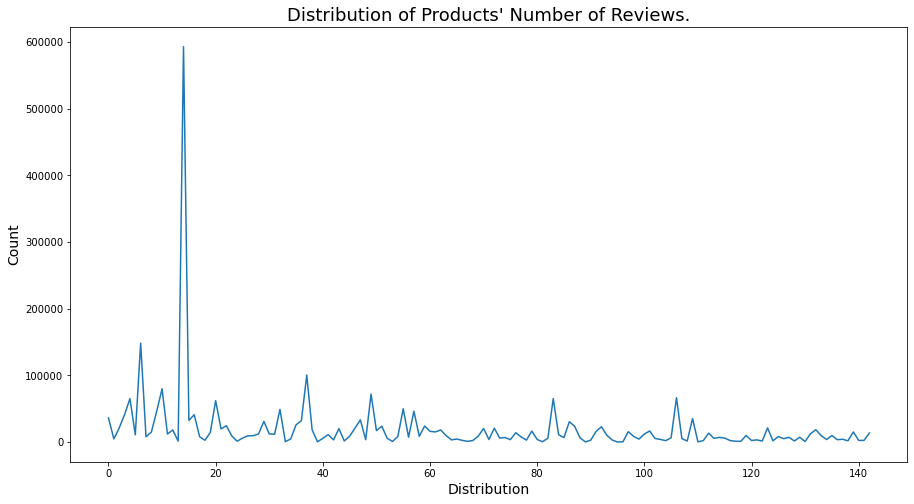

In [36]:
# Adjust plot size, and title
plt.figure(figsize=(15, 8))
plt.title('Distribution of Products\' Number of Reviews.', fontsize=18)

df_clean.no_of_reviews.plot.line()

# Labels
plt.xlabel('Distribution', fontsize=14);
plt.ylabel('Count', fontsize=14);

### Analysis

What the most common over all rating?

In [37]:
df_clean.rating.value_counts()

4.7    38
4.6    31
4.5    28
4.8    22
4.4    14
4.3     3
4.9     3
4.2     2
4.0     2
Name: rating, dtype: int64